In [ ]:
!pip install torch torchvision torchaudio

     |████████████████████████████████| 1.9MB 7.5MB/s 


In [ ]:
!pip install easyocr

     |████████████████████████████████| 63.2MB 44kB/s 


In [ ]:
!pip install imutils

In [ ]:
import cv2
from matplotlib import pyplot as plt
import numpy as np
import imutils
import easyocr

In [ ]:
img = cv2.imread('collabtest3.jpg')

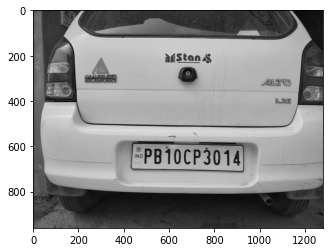

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(cv2.cvtColor(gray, cv2.COLOR_BGR2RGB))

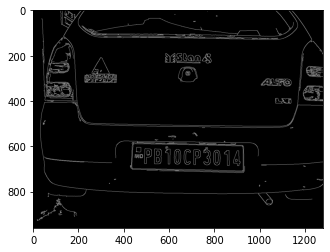

In [ ]:
bfilter = cv2.bilateralFilter(gray, 11, 17, 17) #noise reduction
edged = cv2.Canny(bfilter, 30, 200) #edge detection
plt.imshow(cv2.cvtColor(edged,cv2.COLOR_BGR2RGB))

In [ ]:
keypoints = cv2.findContours(edged.copy(),cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
contours = imutils.grab_contours(keypoints)
contours = sorted(contours, key=cv2.contourArea, reverse=True)[:10]

In [ ]:
location = None
for contour in contours:
  approx = cv2.approxPolyDP(contour, 10, True)
  if len(approx) == 4:
    location = approx
    break;

In [ ]:
location

array([[[441, 594]],

       [[441, 698]],

       [[927, 705]],

       [[920, 598]]], dtype=int32)

In [ ]:
mask = np.zeros(gray.shape, np.uint8)
new_image = cv2.drawContours(mask, [location], 0, 255, -1)
new_image = cv2.bitwise_and(img, img, mask=mask)

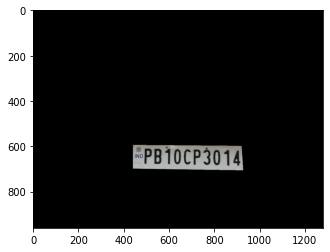

In [ ]:
plt.imshow(cv2.cvtColor(new_image, cv2.COLOR_BGR2RGB))

In [ ]:
(x,y)= np.where(mask==255)
(x1,y1) = (np.min(x), np.min(y))
(x2,y2) = (np.max(x),np.max(y))
cropped_image = gray[x1:x2+1, y1:y2+1]

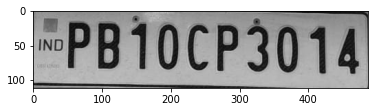

In [ ]:
plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))

Reading number plate using EasyOCR.

In [ ]:
reader = easyocr.Reader(['en'])
result = reader.readtext(cropped_image)
result

CUDA not available - defaulting to CPU. Note: This module is much faster with a GPU.


/usr/local/lib/python3.7/dist-packages/torch/nn/functional.py:718: UserWarning: Named tensors and all their associated APIs are an experimental feature and subject to change. Please do not use them for anything important until they are released as stable. (Triggered internally at  /pytorch/c10/core/TensorImpl.h:1156.)
  return torch.max_pool2d(input, kernel_size, stride, padding, dilation, ceil_mode)


[([[4, 36], [50, 36], [50, 64], [4, 64]], 'IND', 0.9997017161769531),
 ([[35, 0], [487, 0], [487, 107], [35, 107]],
  'PB1OCP3O014',
  0.5637108064327788)]

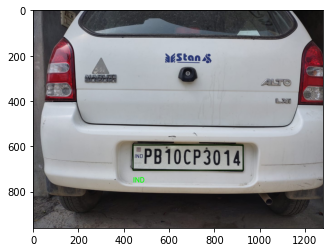

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60),
                  fontFace = font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,25,5,0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))

Reading number plate using pytesseract.

In [ ]:
!pip install pytesseract
# !pip install tesseract
!sudo apt install tesseract-ocr

  Created wheel for pytesseract: filename=pytesseract-0.3.8-py2.py3-none-any.whl size=14071 sha256=7f9ef9be42c0bf13d9998fe944b03921f97d6f1ed2163a7e44d5caa616a111ef
  Stored in directory: /root/.cache/pip/wheels/a2/66/45/88bf1b2d428817a006944b9730b27d6861b776e05a9e262bd4
Successfully built pytesseract
Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  tesseract-ocr-eng tesseract-ocr-osd
The following NEW packages will be installed:
  tesseract-ocr tesseract-ocr-eng tesseract-ocr-osd
0 upgraded, 3 newly installed, 0 to remove and 39 not upgraded.
Need to get 4,795 kB of archives.
After this operation, 15.8 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-eng all 4.00~git24-0e00fe6-1.2 [1,588 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 tesseract-ocr-osd all 4.00~git24-0e00fe6-1.2 [2,989 kB]
Get:3 http:/

In [ ]:
import pytesseract as pytess

In [ ]:
text = pytess.image_to_string(cropped_image)
print(text)

“PB10CP3014



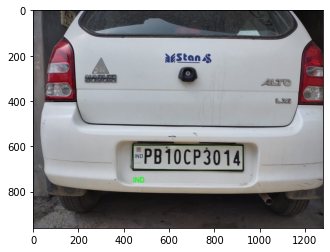

In [ ]:
text = result[0][-2]
font = cv2.FONT_HERSHEY_SIMPLEX
res = cv2.putText(img, text=text, org=(approx[0][0][0], approx[1][0][1]+60),
                  fontFace = font, fontScale=1, color=(0,255,0), thickness=2, lineType=cv2.LINE_AA)
res = cv2.rectangle(img, tuple(approx[0][0]), tuple(approx[2][0]), (0,25,5,0), 3)
plt.imshow(cv2.cvtColor(res, cv2.COLOR_BGR2RGB))